In [1]:
import os 
import math
import csv
import json 
import librosa
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow.keras as keras 
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
DATASET_PATH = "TESS Toronto emotional speech set data"
SAMPLE_RATE = 44100

In [3]:
`
labels = []
for i,(dirpath, dirnames, filenames) in enumerate(os.walk(DATASET_PATH)):
    if dirpath is not DATASET_PATH:
        genre_name = dirpath.split("\\")[-1]
        print ("Currently on: {}".format(genre_name))

        # Processing Audio Files
        for f in filenames:
            print("Processing: {}".format(f))
            audio_path = os.path.join(dirpath, f)
            audio_signal, sample_rate = librosa.load(audio_path, sr=SAMPLE_RATE)
            mfcc = np.mean(librosa.feature.mfcc(audio_signal, sample_rate, n_mfcc=41, n_fft=2048, hop_length=512), axis=0)
            mfcc = mfcc[1:]
            df.loc[len(df)] = [mfcc]
            labels.append(i-1)
df = pd.DataFrame(df['features'].values.tolist())
df = df.assign(Label=labels)  
df = df.fillna(0)
df.to_csv('data.csv')  

de_ps.wav
Processing: OAF_mood_ps.wav
Processing: OAF_moon_ps.wav
Processing: OAF_mop_ps.wav
Processing: OAF_mouse_ps.wav
Processing: OAF_nag_ps.wav
Processing: OAF_name_ps.wav
Processing: OAF_near_ps.wav
Processing: OAF_neat_ps.wav
Processing: OAF_nice_ps.wav
Processing: OAF_note_ps.wav
Processing: OAF_numb_ps.wav
Processing: OAF_pad_ps.wav
Processing: OAF_page_ps.wav
Processing: OAF_pain_ps.wav
Processing: OAF_pass_ps.wav
Processing: OAF_pearl_ps.wav
Processing: OAF_peg_ps.wav
Processing: OAF_perch_ps.wav
Processing: OAF_phone_ps.wav
Processing: OAF_pick_ps.wav
Processing: OAF_pike_ps.wav
Processing: OAF_pole_ps.wav
Processing: OAF_pool_ps.wav
Processing: OAF_puff_ps.wav
Processing: OAF_rag_ps.wav
Processing: OAF_raid_ps.wav
Processing: OAF_rain_ps.wav
Processing: OAF_raise_ps.wav
Processing: OAF_rat_ps.wav
Processing: OAF_reach_ps.wav
Processing: OAF_read_ps.wav
Processing: OAF_red_ps.wav
Processing: OAF_ring_ps.wav
Processing: OAF_ripe_ps.wav
Processing: OAF_road_ps.wav
Processing:

In [4]:
scaler = StandardScaler()
x = scaler.fit_transform(np.array(df.iloc[:, :-1], dtype=float))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df.iloc[:, :-1], dtype=float), df['Label'], test_size = 0.2, shuffle = True)

In [6]:
model = keras.Sequential()
model.add(keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.01),activation="relu", input_shape=(x_train.shape[1],)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.01), activation="relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.01), activation="relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.01), activation="relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(7, activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
mlp_history = model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               132096    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               2

In [7]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mlp_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs = 50, callbacks=es)

Epoch 1/50
70/70 [==============================] - 1s 16ms/step - loss: 21.0469 - accuracy: 0.2192 - val_loss: 19.0466 - val_accuracy: 0.4661
Epoch 2/50
70/70 [==============================] - 1s 13ms/step - loss: 19.0012 - accuracy: 0.3259 - val_loss: 17.9583 - val_accuracy: 0.5196
Epoch 3/50
70/70 [==============================] - 1s 13ms/step - loss: 17.8378 - accuracy: 0.4112 - val_loss: 17.0359 - val_accuracy: 0.5339
Epoch 4/50
70/70 [==============================] - 1s 14ms/step - loss: 16.9440 - accuracy: 0.4304 - val_loss: 16.1732 - val_accuracy: 0.5679
Epoch 5/50
70/70 [==============================] - 1s 13ms/step - loss: 16.1302 - accuracy: 0.4723 - val_loss: 15.4045 - val_accuracy: 0.6304
Epoch 6/50
70/70 [==============================] - 1s 13ms/step - loss: 15.3422 - accuracy: 0.5223 - val_loss: 14.6780 - val_accuracy: 0.6768
Epoch 7/50
70/70 [==============================] - 1s 13ms/step - loss: 14.6464 - accuracy: 0.5549 - val_loss: 14.0336 - val_accuracy: 0.7107

In [8]:
model.save("emotion_detection.h5")

In [9]:
def plot_history(history):
    fig, axs = plt.subplots(2)

    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


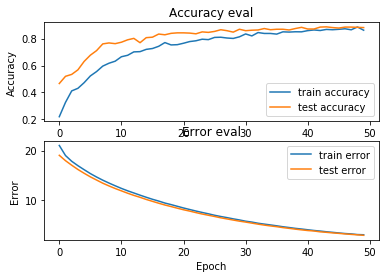

In [10]:
plot_history (mlp_history)

In [11]:
# from sklearn.metrics import accuracy_score, log_loss
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC, LinearSVC, NuSVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="rbf", C=0.025, probability=True),
#     NuSVC(probability=True),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
#     LinearDiscriminantAnalysis(),
#     QuadraticDiscriminantAnalysis()]

# log_cols=["Classifier", "Accuracy", "Log Loss"]
# log = pd.DataFrame(columns=log_cols)

# for clf in classifiers:
#     clf.fit(x_train, y_train)
#     name = clf.__class__.__name__
    
#     print("="*30)
#     print(name)
    
#     print('****Results****')
#     train_predictions = clf.predict(x_test)
#     acc = accuracy_score(y_test, train_predictions)
#     print("Accuracy: {:.4%}".format(acc))
    
#     train_predictions = clf.predict_proba(x_test)
#     ll = log_loss(y_test, train_predictions)
#     print("Log Loss: {}".format(ll))
    
#     log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
#     log = log.append(log_entry)
    
# print("="*30)

In [12]:
df.shape

(2800, 258)